In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [4]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(12.754398100745107, -75.37333570206596),
 (31.9868648415042, 86.79671881240569),
 (-87.97418266369185, 139.88804996788662),
 (84.55899322491086, -49.47894585581017),
 (-19.326797188814766, -164.8613180472911),
 (-54.58286150189443, 169.88099754038984),
 (-2.187046628663083, -96.41922975961035),
 (-68.00880246733155, 133.66936780456115),
 (50.793616284684816, 55.19687332301882),
 (-15.715573263909661, 35.749740319131035),
 (-53.82845971837065, 146.5161162514189),
 (-1.2065576272258056, 113.12998038610084),
 (37.93677646031979, -160.72887841199886),
 (82.53844393086533, -8.755758421819735),
 (71.66022536511613, -114.05228544947555),
 (35.40339945812889, 84.57206879211924),
 (-71.52331807574623, 139.0536946088585),
 (-67.77992455093701, 170.15686620365017),
 (81.84906101851746, 57.81623813219096),
 (-24.69892685705446, -86.7699401902195),
 (-69.088239073885, -161.47701425343382),
 (24.68201786053818, -88.79932498186423),
 (-61.918267380355715, -41.14710741936281),
 (-66.1369096884771, -

In [7]:
# Import citipy module 
from citipy import citipy

In [8]:
# Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combinations
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [9]:
# Loop through all the cities in the list.
for i in range(len(cities)):
    
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 13 of Set 13 | puerto colombia
Processing Record 14 of Set 13 | kathmandu
Processing Record 15 of Set 13 | hobart
Processing Record 16 of Set 13 | upernavik
Processing Record 17 of Set 13 | alofi
Processing Record 18 of Set 13 | bluff
Processing Record 19 of Set 13 | puerto ayora
Processing Record 20 of Set 13 | new norfolk
Processing Record 21 of Set 13 | sol-iletsk
Processing Record 22 of Set 13 | phalombe
Processing Record 23 of Set 13 | sampit
Processing Record 24 of Set 13 | kapaa
Processing Record 25 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 26 of Set 13 | yellowknife
Processing Record 27 of Set 13 | kuche
City not found. Skipping...
Processing Record 28 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 29 of Set 13 | marcona
City not found. Skipping...
Processing Record 30 of Set 13 | mataura
Processing Record 31 of Set 13 | dzilam gonzalez
Processing Record 32 of Set 13 | ushuaia
Processing Record 33 of Se

Processing Record 32 of Set 16 | sentyabrskiy
City not found. Skipping...
Processing Record 33 of Set 16 | havelock
Processing Record 34 of Set 16 | sembakung
Processing Record 35 of Set 16 | hammerfest
Processing Record 36 of Set 16 | severnyy
Processing Record 37 of Set 16 | leningradskiy
Processing Record 38 of Set 16 | kupang
Processing Record 39 of Set 16 | batsfjord
Processing Record 40 of Set 16 | shingu
Processing Record 41 of Set 16 | vila do maio
Processing Record 42 of Set 16 | yumen
Processing Record 43 of Set 16 | georgetown
Processing Record 44 of Set 16 | guerrero negro
Processing Record 45 of Set 16 | shimoda
Processing Record 46 of Set 16 | bengkulu
Processing Record 47 of Set 16 | esperance
Processing Record 48 of Set 16 | sabang
Processing Record 49 of Set 16 | loreto
Processing Record 50 of Set 16 | san lorenzo
Processing Record 1 of Set 17 | salekhard
Processing Record 2 of Set 17 | vanimo
Processing Record 3 of Set 17 | bethel
Processing Record 4 of Set 17 | dikso

Processing Record 17 of Set 20 | ostrovnoy
Processing Record 18 of Set 20 | young
Processing Record 19 of Set 20 | moranbah
Processing Record 20 of Set 20 | mount isa
Processing Record 21 of Set 20 | port moresby
Processing Record 22 of Set 20 | sorland
Processing Record 23 of Set 20 | carauari
Processing Record 24 of Set 20 | sulphur
Processing Record 25 of Set 20 | ramos arizpe
Processing Record 26 of Set 20 | plyussa
Processing Record 27 of Set 20 | meulaboh
Processing Record 28 of Set 20 | lolua
City not found. Skipping...
Processing Record 29 of Set 20 | saint-joseph
Processing Record 30 of Set 20 | requena
Processing Record 31 of Set 20 | kavieng
Processing Record 32 of Set 20 | fortuna
Processing Record 33 of Set 20 | melilla
Processing Record 34 of Set 20 | alappuzha
Processing Record 35 of Set 20 | chara
Processing Record 36 of Set 20 | barcelos
Processing Record 37 of Set 20 | sisimiut
Processing Record 38 of Set 20 | tsaratanana
Processing Record 39 of Set 20 | hamilton
Proc

Processing Record 1 of Set 24 | boralday
Processing Record 2 of Set 24 | arlit
Processing Record 3 of Set 24 | toungoo
City not found. Skipping...
Processing Record 4 of Set 24 | atherton
Processing Record 5 of Set 24 | sioux lookout
Processing Record 6 of Set 24 | ossora
Processing Record 7 of Set 24 | erenhot
Processing Record 8 of Set 24 | yenangyaung
Processing Record 9 of Set 24 | severo-yeniseyskiy
Processing Record 10 of Set 24 | qiongshan
Processing Record 11 of Set 24 | tasbuget
City not found. Skipping...
Processing Record 12 of Set 24 | krasnyy oktyabr
Processing Record 13 of Set 24 | grenfell
Processing Record 14 of Set 24 | kalmar
Processing Record 15 of Set 24 | pangnirtung
Processing Record 16 of Set 24 | carballo
Processing Record 17 of Set 24 | boddam
Processing Record 18 of Set 24 | novita
Processing Record 19 of Set 24 | kayerkan
Processing Record 20 of Set 24 | egvekinot
Processing Record 21 of Set 24 | puro
Processing Record 22 of Set 24 | morehead
Processing Recor

In [11]:
len(cities)

618

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Colombia,10.9878,-74.9547,86.09,75,9,18.41,CO,2021-07-31 17:55:27
1,Kathmandu,27.7167,85.3167,73.62,88,20,2.30,NP,2021-07-31 17:57:27
2,Hobart,-42.8794,147.3294,49.86,65,100,3.00,AU,2021-07-31 17:58:18
3,Upernavik,72.7868,-56.1549,42.51,79,97,5.46,GL,2021-07-31 17:58:19
4,Alofi,-19.0595,-169.9187,78.69,89,100,10.36,NU,2021-07-31 17:58:19
5,Bluff,-46.6000,168.3333,47.80,96,100,2.91,NZ,2021-07-31 17:58:19
6,Puerto Ayora,-0.7393,-90.3518,75.16,87,78,5.99,EC,2021-07-31 17:58:20
7,New Norfolk,-42.7826,147.0587,49.50,67,96,3.00,AU,2021-07-31 17:58:20
8,Sol-Iletsk,51.1631,54.9918,81.28,35,63,5.19,RU,2021-07-31 17:58:20
9,Phalombe,-15.8064,35.6507,60.67,83,52,4.27,MW,2021-07-31 17:58:21


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Colombia,CO,2021-07-31 17:55:27,10.9878,-74.9547,86.09,75,9,18.41
1,Kathmandu,NP,2021-07-31 17:57:27,27.7167,85.3167,73.62,88,20,2.30
2,Hobart,AU,2021-07-31 17:58:18,-42.8794,147.3294,49.86,65,100,3.00
3,Upernavik,GL,2021-07-31 17:58:19,72.7868,-56.1549,42.51,79,97,5.46
4,Alofi,NU,2021-07-31 17:58:19,-19.0595,-169.9187,78.69,89,100,10.36
5,Bluff,NZ,2021-07-31 17:58:19,-46.6000,168.3333,47.80,96,100,2.91
6,Puerto Ayora,EC,2021-07-31 17:58:20,-0.7393,-90.3518,75.16,87,78,5.99
7,New Norfolk,AU,2021-07-31 17:58:20,-42.7826,147.0587,49.50,67,96,3.00
8,Sol-Iletsk,RU,2021-07-31 17:58:20,51.1631,54.9918,81.28,35,63,5.19
9,Phalombe,MW,2021-07-31 17:58:21,-15.8064,35.6507,60.67,83,52,4.27


In [23]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the city_data into a csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

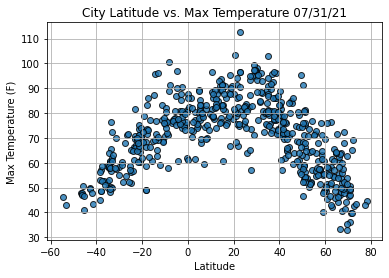

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

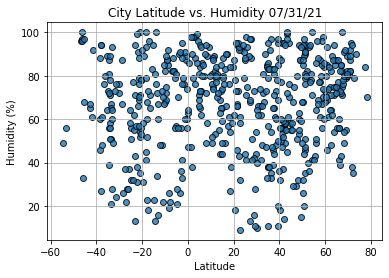

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

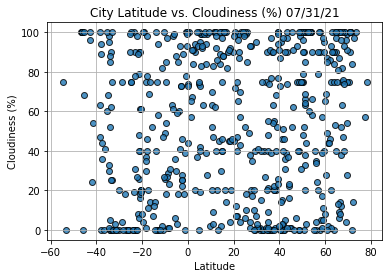

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

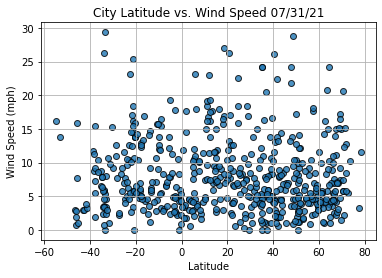

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [50]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2021-07-31 17:58:22
Lat                      -46.1927
Lng                      168.8643
Max Temp                    47.48
Humidity                      100
Cloudiness                    100
Wind Speed                   0.78
Name: 13, dtype: object

In [51]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
556     True
557     True
558     True
559     True
560     True
Name: Lat, Length: 561, dtype: bool

In [62]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Colombia,CO,2021-07-31 17:55:27,10.9878,-74.9547,86.09,75,9,18.41
1,Kathmandu,NP,2021-07-31 17:57:27,27.7167,85.3167,73.62,88,20,2.30
3,Upernavik,GL,2021-07-31 17:58:19,72.7868,-56.1549,42.51,79,97,5.46
8,Sol-Iletsk,RU,2021-07-31 17:58:20,51.1631,54.9918,81.28,35,63,5.19
11,Kapaa,US,2021-07-31 17:56:59,22.0752,-159.3190,82.38,73,65,4.00
12,Yellowknife,CA,2021-07-31 17:58:22,62.4560,-114.3525,76.28,64,20,1.01
14,Dzilam Gonzalez,MX,2021-07-31 17:58:23,21.2833,-88.9333,93.99,46,47,7.67
17,Clyde River,CA,2021-07-31 17:58:23,70.4692,-68.5914,46.63,81,75,5.75
18,Camacha,PT,2021-07-31 17:58:24,33.0833,-16.3333,72.36,68,40,14.97
19,Natchitoches,US,2021-07-31 17:58:24,31.7668,-93.1335,96.21,62,40,5.75


In [63]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

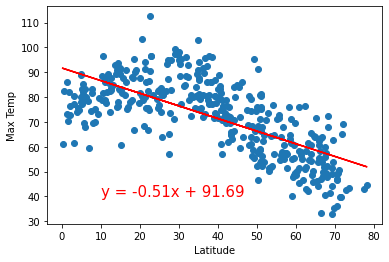

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for Maximum Temperature", "Max Temp",(10,40))

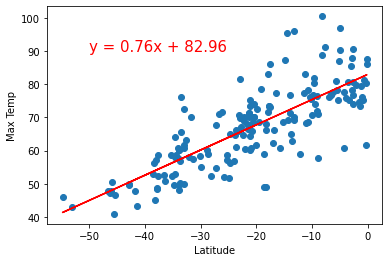

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \ for Maximum Temperature", "Max Temp",(-50,90))

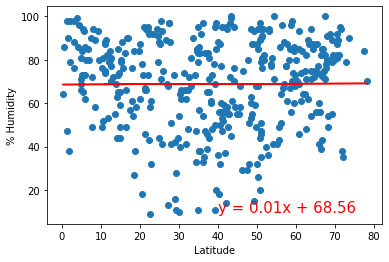

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for % Humidity", "% Humidity",(40,10))

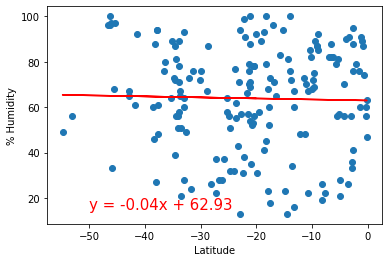

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity",(-50,15))

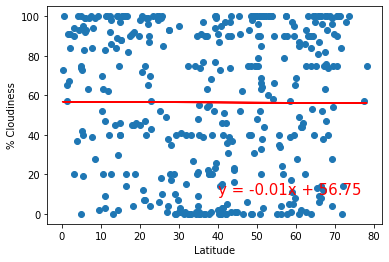

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for % Cloudiness", "% Cloudiness",(40,10))

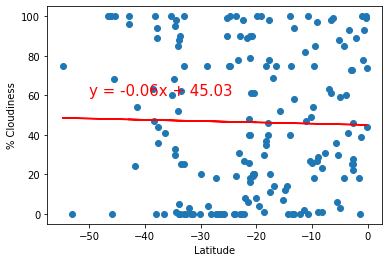

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness",(-50,60))

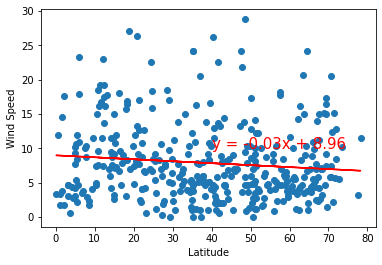

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for Wind Speed", "Wind Speed",(40,10))

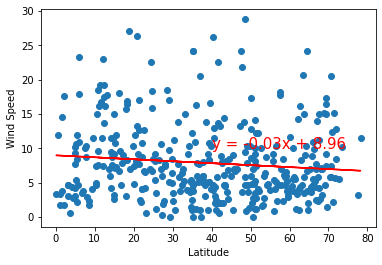

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for Wind Speed", "Wind Speed",(40,10))